# Data Driven Project: Temperature Prediction:

The main aim of this project is to use a set of Data, in order to make a prediction thanks the machine learns methodology.
The Data provided reguard an house in Chievres (Belgium) and has been recorded every 10 minutes, from january 11Th to May 27Th. The taken data are the following:

1) Appliances : Energy used in kW

2) Temperture and relative humidity in the kitchen

3) Temperture and relative humidity in the living room

4) Temperture and relative humidity in the laundry room

5) Temperture and relative humidity in the bathroom

6) Temperture and relative humidity outside the house

7) Temperture and relative humidity in the ironing room

8) Temperture and relative humidity in the teenager room

9) Temperture and relative humidity in the parents room

10)  Temperture and relative humidity outside (from Chievres weather station)

11) Wind speed

12) Dew point temperature

13) Visibility in km

We decided to use these data in order to predict the temperature  of all the rooms in the house every 10 minutes, in order to have the possibility to set a smart thermostat.

Frist of all we import all the needed modules and data sets:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

ExternalFilesFolder =  r"C:\Users\elbar\Desktop\universita\magistrale\Primo Anno\Building System\DataDrivenProject"
DataFileName= "Project_Data.csv"
path_dataFile = os.path.join(ExternalFilesFolder,DataFileName)
DF_data = pd.read_csv(path_dataFile,sep=";" ,index_col=0)

Using pandas it's possible to transform the indexes into datetime datas:

In [4]:
PreviousIndex = DF_data.index
NewParsedIndex= pd.to_datetime(PreviousIndex)
DF_data.index =NewParsedIndex 
DF_data=DF_data.rename(columns={"T1":"T_kitchen","T2":"T_living_room","T3":"T_laundry","T4":"T_office","T5":"T_bathroom","T6":"T_outside","T7":"T_ironing","T8":"T_teenager","T9":"T_parents"})

Creating a lag feature and applying it to some parameters of my dataframe in order to have more meaningfull data for our predictions:

In [5]:
def lag_feature(df,column_name,lag_start,lag_end,lag_interval):
    for i in range(lag_start,lag_end,lag_interval):
        new_column_name= column_name + "-" + str(i) + "0min"
        df[new_column_name]=df[column_name].shift(i)
        df=df.dropna()
    return(df)
ListOfTemperature=["T_kitchen","T_living_room","T_laundry","T_office","T_bathroom","T_outside","T_ironing","T_teenager","T_parents"]

for i in ListOfTemperature:
        
    lag_start=1
    lag_end=7
    lag_interval=1
    column_name= i
    df=DF_data
    DF_data=lag_feature(DF_data,column_name,lag_start,lag_end,lag_interval)

C:\Users\Gilberto\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In order to have a continuous correlation between time and datas, we define sin_hour and cos_hour and add them to the dataframe. We also add the temperature of the rooms related to the previous days:

In [6]:
DF_data["hour"]=DF_data.index.hour
DF_data["sin_hour"]=np.sin(DF_data.index.hour*2*np.pi/24)
DF_data["cos_hour"]=np.cos(DF_data.index.hour*2*np.pi/24)

for i in ListOfTemperature:
    namecolumn= str(i)+"-24H"
    DF_data[namecolumn]=DF_data[i].shift(+144)

DF_data=DF_data.dropna()

Now we show the correlations among the different data: it's clearly visible that the temperature of different rooms show an high correlation factor among them, while the Appliances and lights, against the expectations, are not so related with the other data.

In [7]:
DF_data.corr()

,Appliances,lights,T_kitchen,RH_1,T_living_room,RH_2,T_laundry,RH_3,T_office,RH_4,...,cos_hour,T_kitchen-24H,T_living_room-24H,T_laundry-24H,T_office-24H,T_bathroom-24H,T_outside-24H,T_ironing-24H,T_teenager-24H,T_parents-24H
Appliances,1.000000,0.193062,0.055563,0.088089,0.120767,-0.060715,0.087066,0.038143,0.040667,0.017408,...,-0.235735,0.020850,0.099064,0.005072,0.021904,-0.008765,0.123971,0.019012,-0.002372,-0.002561
lights,0.193062,1.000000,-0.016859,0.096962,-0.003130,0.043571,-0.089871,0.120835,-0.002536,0.103496,...,0.016665,-0.028441,-0.003805,-0.110054,-0.103434,-0.074208,-0.072551,-0.134982,-0.075892,-0.156027
T_kitchen,0.055563,-0.016859,1.000000,0.187802,0.837448,0.010106,0.890561,0.002876,0.877434,0.121405,...,0.132924,0.862875,0.759433,0.812655,0.802438,0.803393,0.693360,0.769482,0.756123,0.786016
RH_1,0.088089,0.096962,0.187802,1.000000,0.283071,0.795798,0.280539,0.843415,0.120151,0.878344,...,-0.039271,0.160416,0.270975,0.221068,0.080094,0.168060,0.348077,0.023078,-0.057513,0.114524
T_living_room,0.120767,-0.003130,0.837448,0.283071,1.000000,-0.161248,0.734940,0.140188,0.760671,0.244945,...,-0.152027,0.707581,0.851163,0.648187,0.667059,0.641869,0.776600,0.589520,0.514220,0.613572
RH_2,-0.060715,0.043571,0.010106,0.795798,-0.161248,1.000000,0.153332,0.677240,-0.039976,0.718473,...,0.184694,0.027285,-0.081766,0.137663,-0.036510,0.086871,0.049267,-0.027289,-0.055121,0.068552
T_laundry,0.087066,-0.089871,0.890561,0.280539,0.734940,0.153332,1.000000,0.022220,0.853134,0.148845,...,0.026010,0.813534,0.706305,0.857325,0.810591,0.822617,0.732598,0.803301,0.738169,0.853777
RH_3,0.038143,0.120835,0.002876,0.843415,0.140188,0.677240,0.022220,1.000000,-0.124802,0.898271,...,0.058007,-0.069850,0.087801,-0.068768,-0.187844,-0.086341,0.109715,-0.269163,-0.326304,-0.205247
T_office,0.040667,-0.002536,0.877434,0.120151,0.760671,-0.039976,0.853134,-0.124802,1.000000,-0.036564,...,0.004405,0.835633,0.733058,0.820806,0.876416,0.839219,0.700169,0.829514,0.754969,0.857916
RH_4,0.017408,0.103496,0.121405,0.878344,0.244945,0.718473,0.148845,0.898271,-0.036564,1.000000,...,0.021269,0.043130,0.191362,0.079774,-0.095060,0.027072,0.258260,-0.144415,-0.201259,-0.060946


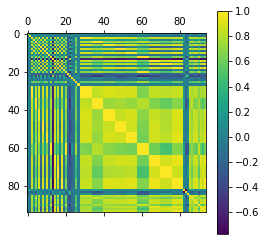

In [8]:
plt.figure()
plt.matshow(DF_data.corr())
plt.colorbar()
plt.show()

Therefore, we can exclude some misleading data:

In [9]:
DF_data=DF_data.drop("rv1",1)
DF_data=DF_data.drop("rv2",1)
DF_data=DF_data.drop("Visibility",1)

Now we import all the functions usefull in order to run the prediction:

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor

DF_prediction=DF_data["2016-03-01":"2016-05-15"]

Following are showed the predictions of all the rooms, in three different ways:

1) Linear Regression

2) Linear Regression with k-fold cross validation

3) Random Forest

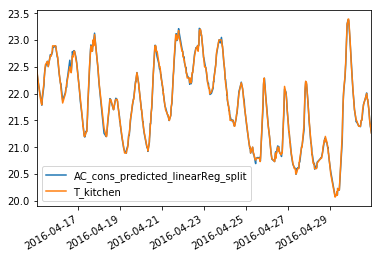

The R^2 of T_kitchen is 0.998666167127


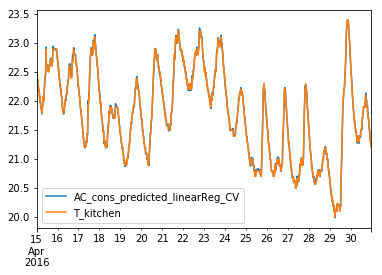

The R^2 of T_kitchen with cross validation is 0.998623902089


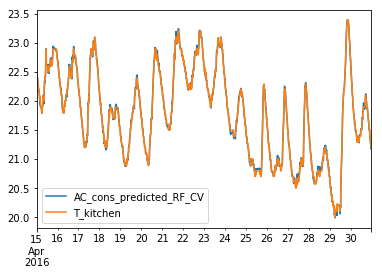

The R^2 of T_kitchen with random forest 0.881953592637


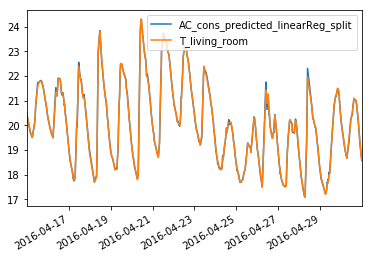

The R^2 of T_living_room is 0.998838579662


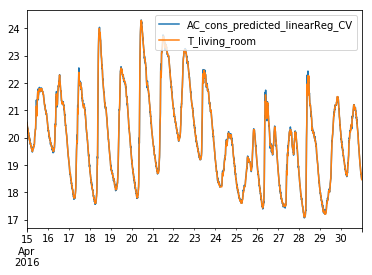

The R^2 of T_living_room with cross validation is 0.998556561158


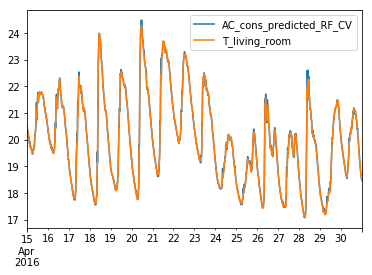

The R^2 of T_living_room with random forest 0.980789932358


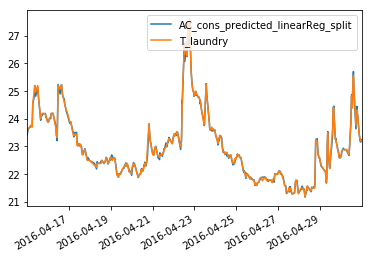

The R^2 of T_laundry is 0.998167667625


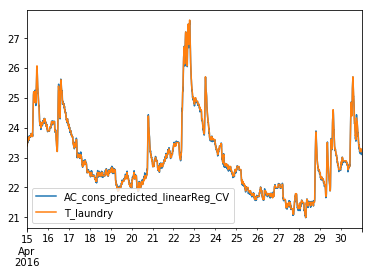

The R^2 of T_laundry with cross validation is 0.998182791129


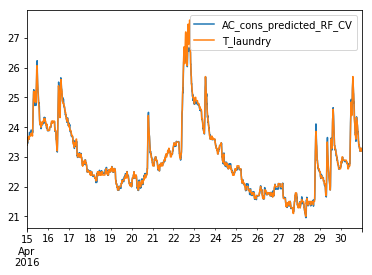

The R^2 of T_laundry with random forest 0.989303693966


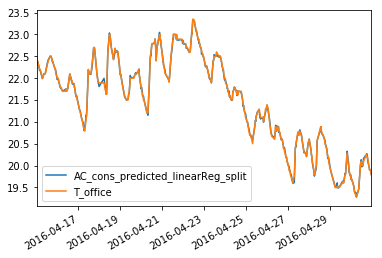

The R^2 of T_office is 0.998831417815


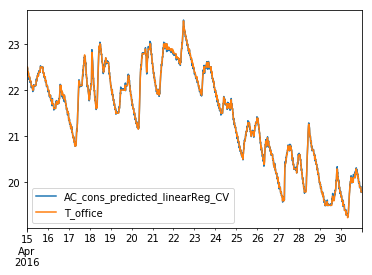

The R^2 of T_office with cross validation is 0.998811364905


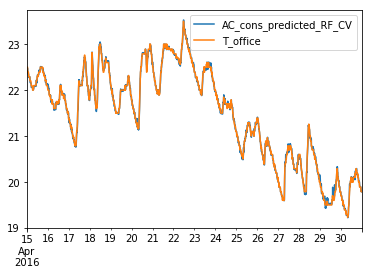

The R^2 of T_office with random forest 0.916977581495


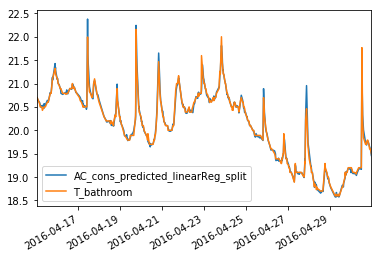

The R^2 of T_bathroom is 0.994671194565


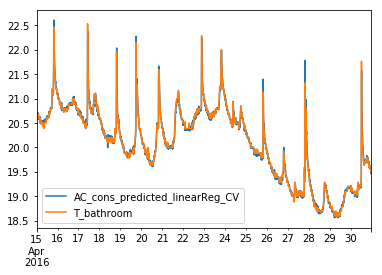

The R^2 of T_bathroom with cross validation is 0.993292050057


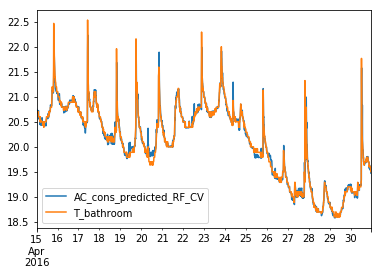

The R^2 of T_bathroom with random forest 0.851082993865


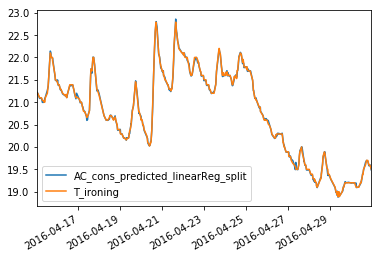

The R^2 of T_ironing is 0.999385587971


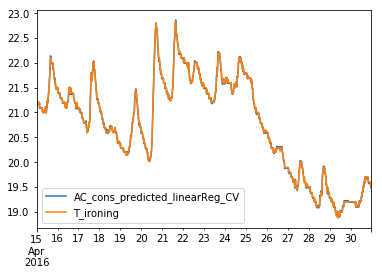

The R^2 of T_ironing with cross validation is 0.999372364191


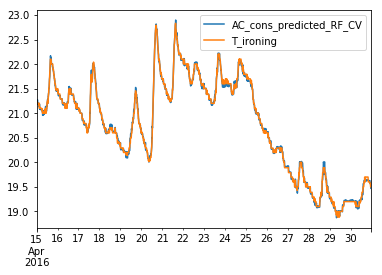

The R^2 of T_ironing with random forest 0.923480658097


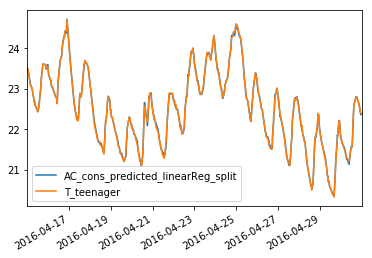

The R^2 of T_teenager is 0.998846866261


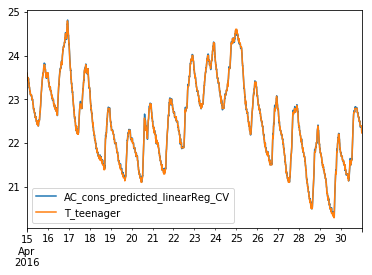

The R^2 of T_teenager with cross validation is 0.998901370526


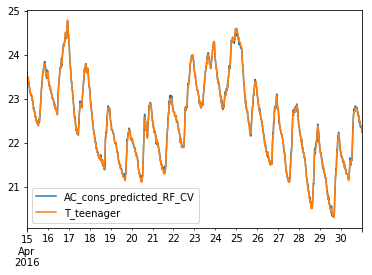

The R^2 of T_teenager with random forest 0.974246277544


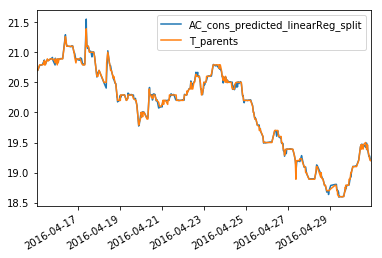

The R^2 of T_parents is 0.999066822754


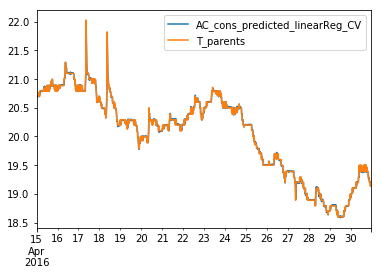

The R^2 of T_parents with cross validation is 0.998671663132


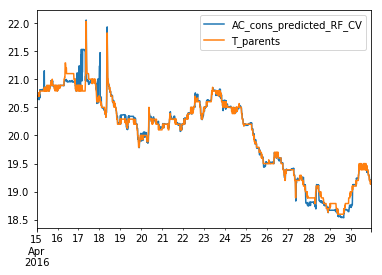

The R^2 of T_parents with random forest 0.548280637595


In [11]:
ListOfTemperatureToPredict=["T_kitchen","T_living_room","T_laundry","T_office","T_bathroom","T_ironing","T_teenager","T_parents"]

for i in ListOfTemperatureToPredict:
    DF_target=DF_prediction[i]
    DF_features=DF_prediction.drop(i, axis=1)
     
    X_train,X_test,Y_train,Y_test=train_test_split(DF_features,DF_target,test_size=0.2, random_state=41234)    
    
    linear_reg = linear_model.LinearRegression()   
    linear_reg.fit(X_train,Y_train)
    
    predicted_linearReg_split=linear_reg.predict(X_test)    
    predicted_DF_linearReg_split=pd.DataFrame(predicted_linearReg_split,index=Y_test.index, columns=["AC_cons_predicted_linearReg_split"])
    predicted_DF_linearReg_split=predicted_DF_linearReg_split.join(Y_test)
    
    predicted_DF_linearReg_split_pred=predicted_DF_linearReg_split["2016-04-15":"2016-05-01"]
    predicted_DF_linearReg_split_pred.plot()
    plt.show()
    r2_linearReg_split=r2_score(predicted_linearReg_split,Y_test)
    
    print("The R^2 of "+ i + " is " + str(r2_linearReg_split))
    
    
        
    predict_DF_linearReg_CV = cross_val_predict(linear_reg,DF_features, DF_target, cv=10)
    predicted_DF_linearReg_CV=pd.DataFrame(predict_DF_linearReg_CV,index=DF_target.index, columns=["AC_cons_predicted_linearReg_CV"])
    
    predicted_DF_linearReg_CV=predicted_DF_linearReg_CV.join(DF_target)
    predicted_DF_linearReg_CV_prd=predicted_DF_linearReg_CV["2016-04-15":"2016-05-01"]
    
    predicted_DF_linearReg_CV_prd.plot()
    plt.show()
    r2_linearReg_CV=r2_score(predict_DF_linearReg_CV,DF_target)
    
    print("The R^2 of "+ i + " with cross validation is " + str(r2_linearReg_CV))
    
    
    
    
    reg_RF = RandomForestRegressor()
    predict_RF_CV = cross_val_predict(reg_RF,DF_features, DF_target, cv=10) 
    predicted_DF_RF_CV=pd.DataFrame(predict_RF_CV,index=DF_target.index, columns=["AC_cons_predicted_RF_CV"])
    predicted_DF_RF_CV=predicted_DF_RF_CV.join(DF_target)    
    
    predicted_DF_RF_CV_pr=predicted_DF_RF_CV["2016-04-15":"2016-05-01"]
    predicted_DF_RF_CV_pr.plot()
    plt.show()
    r2_RF_CV=r2_score(predict_RF_CV,DF_target)
    print("The R^2 of "+ i + " with random forest " + str(r2_RF_CV))

    


As we can clearly see, the linear regression model perfectly fit the problem, given a value of R^2 of almost 1.
Using k-fold cross validation in order to manage in a better way the training and test data, we reach the same results. While with random forest algorithm we have a lower approximations with respect the linear regression and linear regression with cross validation. This means that this type of data are better approximated with a linear regression model, with respect the random forest. 